### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle as pkl

### Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/E_Commerce_Sales/Ecommerce Customers.csv')

In [ ]:
p = df.head()
p
#p.to_csv('sample.csv')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### Data Visualization

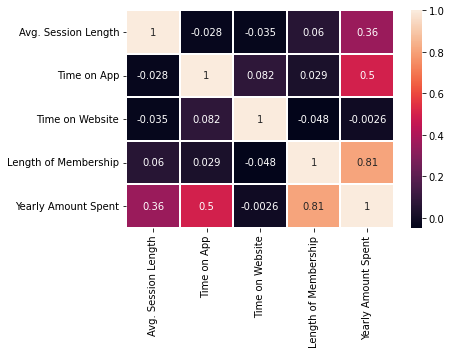

In [ ]:
sns.heatmap(df.corr(),linewidth=1, annot = True)

In [ ]:
#plot.style.use('dark_background')

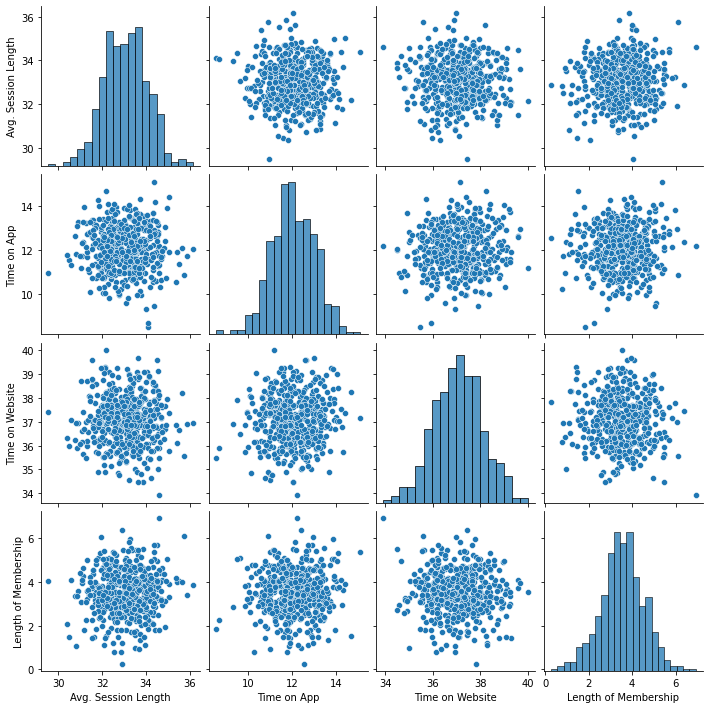

In [ ]:
sns.pairplot(df.drop(['Yearly Amount Spent'], axis = 1))

Text(0, 0.5, 'Yearly Amount Spent')

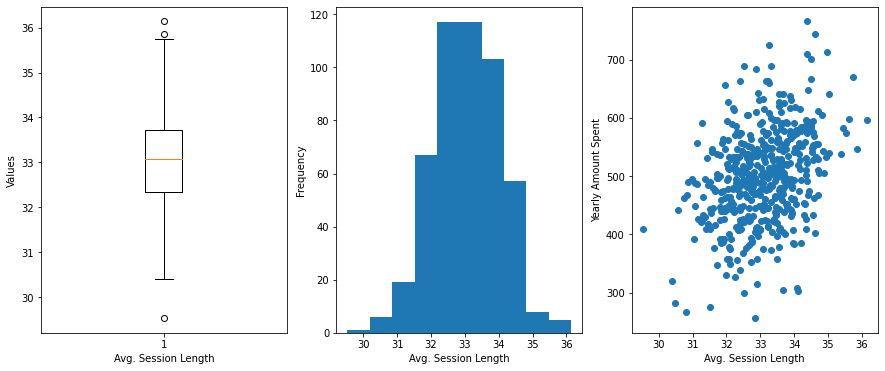

In [ ]:
## Avg Session Length
plt.figure(figsize=(15,6))
x = df['Avg. Session Length']
y = df['Yearly Amount Spent']
plt.subplot(1,3,1)
plt.boxplot(x)
plt.xlabel('Avg. Session Length')
plt.ylabel('Values')
plt.subplot(1,3,2)
plt.hist(x)
plt.xlabel('Avg. Session Length')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.scatter(x,y)
plt.xlabel('Avg. Session Length')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

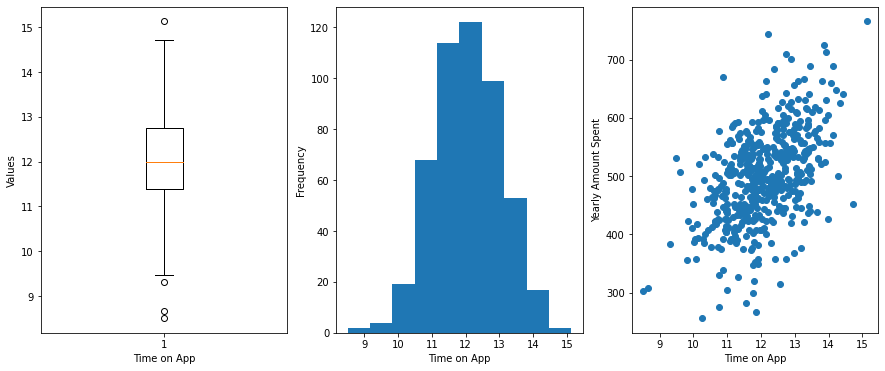

In [ ]:
## Time on App
plt.figure(figsize=(15,6))
x = df['Time on App']
y = df['Yearly Amount Spent']
plt.subplot(1,3,1)
plt.boxplot(x)
plt.xlabel('Time on App')
plt.ylabel('Values')
plt.subplot(1,3,2)
plt.hist(x)
plt.xlabel('Time on App')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.scatter(x,y)
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

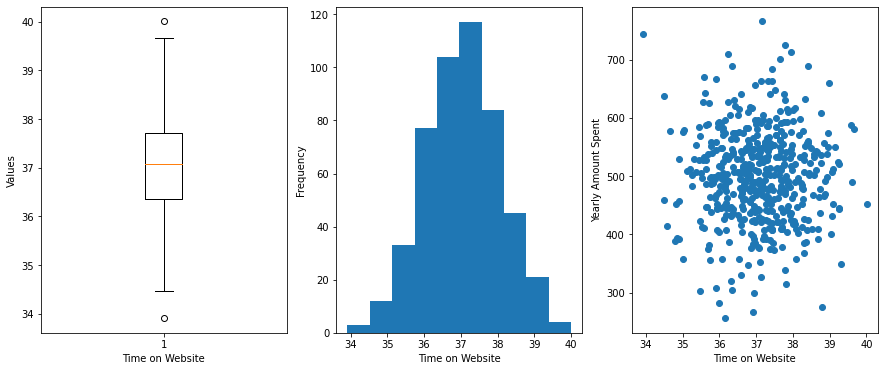

In [ ]:
## Time on Website
plt.figure(figsize=(15,6))
x = df['Time on Website']
y = df['Yearly Amount Spent']
plt.subplot(1,3,1)
plt.boxplot(x)
plt.xlabel('Time on Website')
plt.ylabel('Values')
plt.subplot(1,3,2)
plt.hist(x)
plt.xlabel('Time on Website')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.scatter(x,y)
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

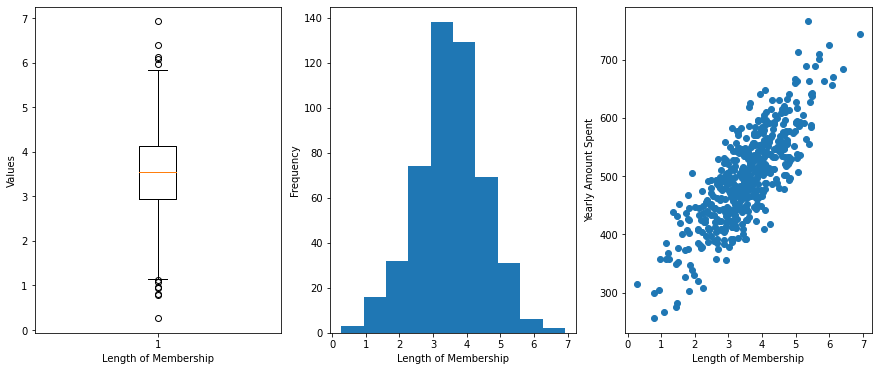

In [ ]:
## Length of Membership
plt.figure(figsize=(15,6))
x = df['Length of Membership']
y = df['Yearly Amount Spent']
plt.subplot(1,3,1)
plt.boxplot(x)
plt.xlabel('Length of Membership')
plt.ylabel('Values')
plt.subplot(1,3,2)
plt.hist(x)
plt.xlabel('Length of Membership')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.scatter(x,y)
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

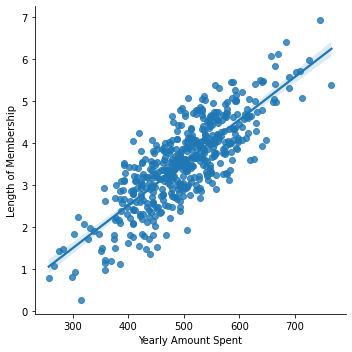

In [ ]:
sns.lmplot(x="Yearly Amount Spent", y="Length of Membership", data=df)

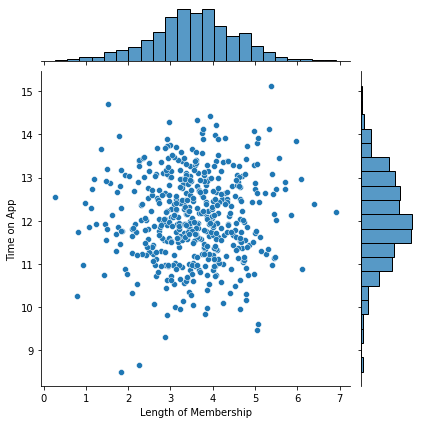

In [ ]:
sns.jointplot(data = df , x = 'Length of Membership' , y = 'Time on App')

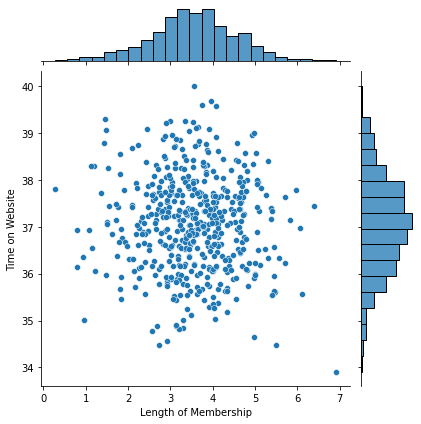

In [ ]:
sns.jointplot(data = df , x = 'Length of Membership' , y = 'Time on Website')

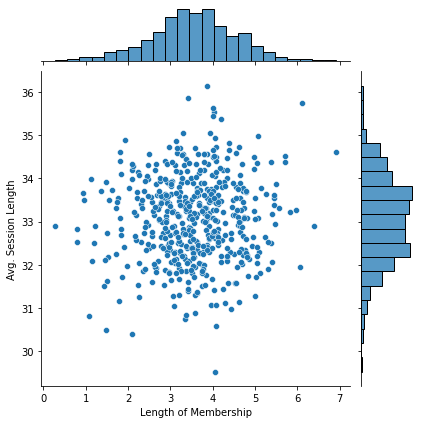

In [ ]:
sns.jointplot(data = df , x = 'Length of Membership' , y = 'Avg. Session Length')

Positive correlation betweet Length of Membership and Yearly Amount Spent

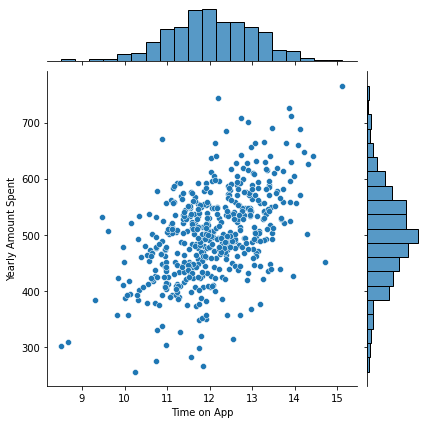

In [ ]:
sns.jointplot(data = df , x = 'Time on App' , y = 'Yearly Amount Spent')

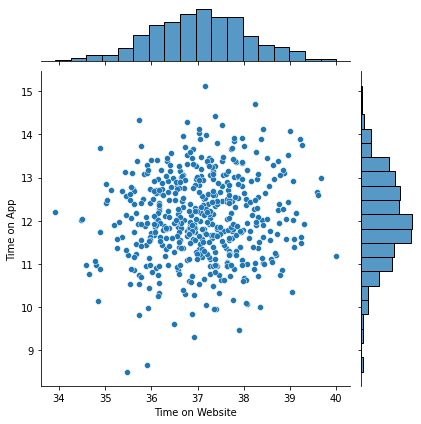

In [ ]:
sns.jointplot(data = df , x = 'Time on Website' , y = 'Time on App')

No correlation between time spent on App and Website by the customers.

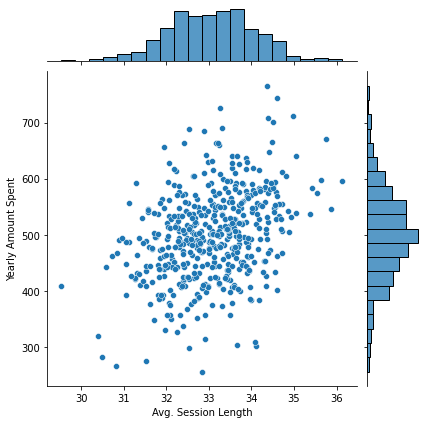

In [ ]:
sns.jointplot(data = df , x = 'Avg. Session Length' , y = 'Yearly Amount Spent')

### Modeling

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.9778130629184126

In [ ]:
model.score(x_train, y_train)

0.9854240629700333

In [ ]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  8.558441885315244
MSE:  109.86374118394029
RMSE:  10.48159058463649


In [ ]:
import pickle as pkl
pkl.dump(lr,open('Linear.pkl','wb'))

### Decision Tree

In [ ]:
dtree = DecisionTreeRegressor(random_state=1).fit(x_train, y_train)

In [ ]:
tree_pred = dtree.predict(x_test)

In [ ]:
r2_score(y_test, tree_pred)

0.8515716316403328

In [ ]:
dtree.score(x_train, y_train)

1.0

In [ ]:
dtree.score(x_test, y_test)

0.8515716316403328

In [ ]:
print("MAE : ", mean_absolute_error(y_test, tree_pred))
print("MSE : ", mean_squared_error(y_test, tree_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, tree_pred)))

MAE :  21.600092597672806
MSE :  734.9773330972254
RMSE:  27.110465379576674


### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state = 7).fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
r2_score(y_test, rf_pred)

0.934510943712755

In [ ]:
rf.score(x_train, y_train)

0.992049866753966

In [ ]:
print("MAE : ", mean_absolute_error(y_test, rf_pred))
print("MSE : ", mean_squared_error(y_test, rf_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rf_pred)))

MAE :  13.720334841265935
MSE :  324.28418144716755
RMSE:  18.007892198899004
